# Getting started with TensorFlow Decision Forests


# Introduction

We'll be working with the [Tabular Playground Series May 2022](https://www.kaggle.com/competitions/tabular-playground-series-may-2022/data) Kaggle Dataset.  It is a tabular dataset with 900,000 rows and 33 columns (318MB .CSV training dataset + 247MB .CSV test set) that is suitable for training algorithms to solve binary classification problems (in this case to determine if a machine is in a state of "0" or "1" based off of input sensor data).  

We'll be using [TensorFlow Decision Forests](https://www.tensorflow.org/decision_forests) (TF-DF) to train our model.  TensorFlow Decision Forests is a TensorFlow wrapper for the [Yggdrasil Decision Forests C++ libraries](https://github.com/google/yggdrasil-decision-forests).  TF-DF makes it very easy to train, serve and interpret various Decision Forest models such as [RandomForests](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel) and [GrandientBoostedTrees](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/GradientBoostedTreesModel).  These types of decision forest models require minimal pre-processing of the data and are great when working with tabular datasets and/or small datasets (especially if you just want a quick baseline result to compare against).

Step 1: Import Python packages

In [2]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 24.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.5/497.5 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 24.5 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 21.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation

In [3]:
# Import Python packages
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Define helper functions
def plot_tfdf_model_training_curves(model):
    # This function was adapted from the following tutorial:
    # https://www.tensorflow.org/decision_forests/tutorials/beginner_colab
    logs = model.make_inspector().training_logs()

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy (out-of-bag)")

    plt.subplot(1, 2, 2)
    plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
    plt.xlabel("Number of trees")
    plt.ylabel("Logloss (out-of-bag)")

    plt.show()

In [4]:
import tensorflow_decision_forests as tfdf
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow Decision Forests v0.2.4


Step 2: Identify the location of the data

In [5]:
# print list of all data and files attached to this notebook
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv


Step 3: Load the data

In [6]:
# load to pandas dataframe (for data exploration)
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/train.csv')
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/test.csv')

# load to tensorflow dataset (for model training)
train_tfds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="target")
test_tfds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

/opt/conda/lib/python3.7/site-packages/tensorflow_decision_forests/keras/core.py:2036: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)
2022-05-01 20:21:06.829859: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-05-01 20:21:06.856612: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

Step 4: Explore the data

In [7]:
# print column names
print(train_df.columns)

Index(['id', 'f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07',
       'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'target'],
      dtype='object')


In [8]:
# preview first few rows of data
train_df.head(10)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1
5,5,1.349785,1.100418,0.562612,-0.607076,1.264728,0.283515,-1.131953,6,2,...,-2.259781,-1.308329,-2.216110,1.016892,0.273792,BDAEDBDEDA,45.890998,0,1,0
6,6,1.904853,-0.174135,0.193908,-0.559832,-0.146990,-0.538386,0.270837,2,5,...,-2.832988,2.432185,-1.827240,1.192390,-0.333300,ACBCAAAHHE,358.058637,1,0,1
7,7,0.889100,0.388168,1.062274,-1.775401,0.852494,0.335741,0.510709,2,3,...,7.956038,2.663890,-0.593400,1.528621,0.972924,BBBDBBEPDB,-113.797366,1,1,0
8,8,0.866221,0.842351,-1.367634,1.237506,0.682962,0.845666,0.173852,3,2,...,-1.241121,-1.245038,1.696402,0.354545,-0.541267,ACAEBADDAA,-52.223857,0,0,0
9,9,0.829142,-0.082872,-0.206667,-0.032502,0.366289,0.277981,-1.113467,2,0,...,-3.117106,-3.609328,2.677487,-1.772600,-3.053609,BABCBBBABD,-42.976312,0,0,1


In [9]:
# print basic summary statistics
train_df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765473,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


<AxesSubplot:>

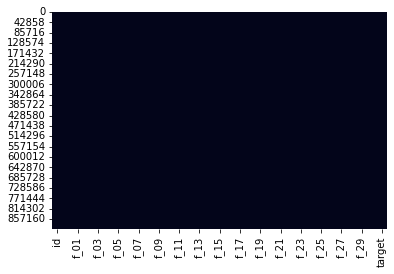

In [10]:
# check for missing values
sns.heatmap(train_df.isnull(), cbar=False)

# RandomForest

Step 5: Train a [Random Forest](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf) Model



> "A Random Forest is a collection of deep CART decision trees trained independently and without pruning. Each tree is trained on a random subset of the original training dataset (sampled with replacement).
> 
> The algorithm is unique in that it is robust to overfitting, even in extreme cases e.g. when there is more features than training examples.
> 
> It is probably the most well-known of the Decision Forest training algorithms"




 ~ Quoted from [TFDF RandomForest documentation ](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel)

One neat thing about TF-DF is that in addition to having a default set of hyper-parameters, you are also provided with a list of additional hyper-parameter choices to consider.  This makes it a lot easier to optimize model performance because you do not have to do this expensive hyper-parameter optimization step all by yourself.

In [11]:
print(tfdf.keras.RandomForestModel.predefined_hyperparameters())

[HyperParameterTemplate(name='better_default', version=1, parameters={'winner_take_all': True}, description='A configuration that is generally better than the default parameters without being more expensive.'), HyperParameterTemplate(name='benchmark_rank1', version=1, parameters={'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}, description='Top ranking hyper-parameters on our benchmark slightly modified to run in reasonable time.')]


In [12]:
# Train the model
rf_model = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1",
                                        compute_oob_variable_importances=True)
rf_model.fit(x=train_tfds)
model = rf_model

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp4p45qxnu as temporary training directory
Starting reading the dataset
900/900 [==============================] - ETA: 0s
Dataset read in 0:00:29.202031
Training model
Model trained in 3:20:57.478424
Compiling model


[INFO kernel.cc:1153] Loading model from path
[INFO abstract_model.cc:1063] Engine "RandomForestGeneric" built
[INFO kernel.cc:1001] Use fast generic engine


900/900 [==============================] - 12114s 13s/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [13]:
# Visualize the model
# Currently this step works in the Kaggle Notebook Editor but unfortunately displays an empty/blank visualization in the Notebook Viewer
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

Step 6: Evaluate your Random Forest Model

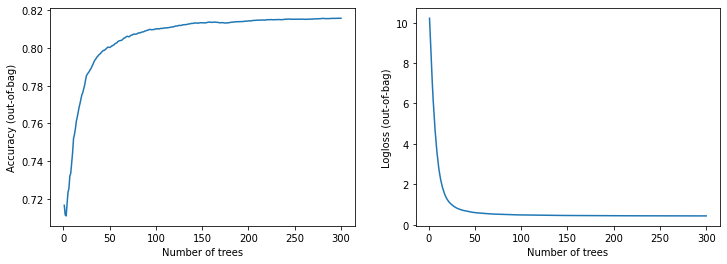

In [14]:
plot_tfdf_model_training_curves(model)

In [15]:
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=900000, accuracy=0.8157344444444444, loss=0.4364516066724652, rmse=None, ndcg=None, aucs=None)

In [16]:
print("Model type:", inspector.model_type())
print("Objective:", inspector.objective())
print("Evaluation:", inspector.evaluation())

Model type: RANDOM_FOREST
Objective: Classification(label=__LABEL, class=None, num_classes=2)
Evaluation: Evaluation(num_examples=900000, accuracy=0.8157344444444444, loss=0.4364516066724652, rmse=None, ndcg=None, aucs=None)


80% accuracy is not a bad baseline result given how quickly we put this together (and with so few lines of code).

Step 7: Investigate variable importances for the RandomForest model

In [17]:
# Adapted from https://www.tensorflow.org/decision_forests/tutorials/advanced_colab
# See list of inspector methods from:
# [field for field in dir(inspector) if not field.startswith("_")]
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 MEAN_DECREASE_IN_AUC_2_VS_OTHERS
	 MEAN_DECREASE_IN_PRAUC_2_VS_OTHERS
	 SUM_SCORE
	 MEAN_DECREASE_IN_ACCURACY
	 NUM_NODES
	 NUM_AS_ROOT
	 MEAN_MIN_DEPTH
	 MEAN_DECREASE_IN_AP_2_VS_OTHERS


In [18]:
inspector.variable_importances()["MEAN_DECREASE_IN_ACCURACY"]

[("f_26" (1; #26), 0.02535998821258545),
 ("f_21" (1; #21), 0.0220644474029541),
 ("f_19" (1; #19), 0.016075551509857178),
 ("f_25" (1; #25), 0.013108909130096436),
 ("f_22" (1; #22), 0.013105571269989014),
 ("f_20" (1; #20), 0.010294437408447266),
 ("f_00" (1; #0), 0.008327782154083252),
 ("f_23" (1; #23), 0.008141100406646729),
 ("f_02" (1; #2), 0.007855534553527832),
 ("f_01" (1; #1), 0.0072411298751831055),
 ("f_24" (1; #24), 0.00670778751373291),
 ("f_07" (1; #7), 0.005577802658081055),
 ("f_05" (1; #5), 0.003782212734222412),
 ("f_28" (1; #28), 0.003651142120361328),
 ("f_30" (1; #30), 0.002985537052154541),
 ("f_14" (1; #14), 0.002480030059814453),
 ("f_08" (1; #8), 0.002447783946990967),
 ("f_09" (1; #9), 0.002385556697845459),
 ("f_11" (1; #11), 0.0023055672645568848),
 ("f_10" (1; #10), 0.0019388794898986816),
 ("f_15" (1; #15), 0.0016344189643859863),
 ("f_04" (1; #4), 0.0015189051628112793),
 ("f_12" (1; #12), 0.0014844536781311035),
 ("f_03" (1; #3), 0.0013121962547302246)

In [19]:
inspector.variable_importances()["MEAN_DECREASE_IN_AUC_2_VS_OTHERS"]

[("f_26" (1; #26), 0.024391836561884594),
 ("f_21" (1; #21), 0.02076414623676992),
 ("f_19" (1; #19), 0.01497445824664756),
 ("f_22" (1; #22), 0.012438364922495726),
 ("f_25" (1; #25), 0.01069403018162196),
 ("f_20" (1; #20), 0.008849477227098501),
 ("f_00" (1; #0), 0.007933710522577408),
 ("f_23" (1; #23), 0.007531635370171208),
 ("f_02" (1; #2), 0.006690149907365273),
 ("f_01" (1; #1), 0.006499215728393182),
 ("f_24" (1; #24), 0.005278499769946654),
 ("f_07" (1; #7), 0.004663664357794306),
 ("f_05" (1; #5), 0.0035489130096987287),
 ("f_28" (1; #28), 0.002877450298252815),
 ("f_14" (1; #14), 0.002435529784230339),
 ("f_30" (1; #30), 0.002246698123498536),
 ("f_11" (1; #11), 0.002046419579404435),
 ("f_08" (1; #8), 0.0018885295999631069),
 ("f_09" (1; #9), 0.0017282257934607692),
 ("f_10" (1; #10), 0.0015123155616195705),
 ("f_15" (1; #15), 0.0014726516238656728),
 ("f_03" (1; #3), 0.001266488616800121),
 ("f_12" (1; #12), 0.0012205287254117847),
 ("f_04" (1; #4), 0.0011965880459823275

# GradientBoostedTrees

Step 8: Train a [GradientBoostedTrees](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf) model.  GradientBoostedTrees often perform better than the RandomForests we were using previously.



> "A GBT (Gradient Boosted Tree) is a set of shallow decision trees trained sequentially. Each tree is trained to predict and then "correct" for the errors of the previously trained trees (more precisely each tree predict the gradient of the loss relative to the model output)"



 ~ Quoted from [TFDF GradientBoostedTrees documentation ](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/GradientBoostedTreesModel)


In [20]:
# As mentioned previously, TF-DF gives you lots of different "default" hyper-parameter settings to choose from.
print(tfdf.keras.GradientBoostedTreesModel.predefined_hyperparameters())

[HyperParameterTemplate(name='better_default', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL'}, description='A configuration that is generally better than the default parameters without being more expensive.'), HyperParameterTemplate(name='benchmark_rank1', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}, description='Top ranking hyper-parameters on our benchmark slightly modified to run in reasonable time.')]


In [21]:
# Train the model
gb_model = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template="benchmark_rank1")
gb_model.fit(x=train_tfds)
model = gb_model

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpj7ab_b8b as temporary training directory
Starting reading the dataset
899/900 [============================>.] - ETA: 0s
Dataset read in 0:00:23.318390
Training model
Model trained in 1:12:28.077306
Compiling model
900/900 [==============================] - 4371s 5s/step


[INFO kernel.cc:1153] Loading model from path
[INFO abstract_model.cc:1063] Engine "GradientBoostedTreesGeneric" built
[INFO kernel.cc:1001] Use fast generic engine


In [22]:
# Visualize the model
# Currently this step works in the Kaggle Notebook Editor but unfortunately displays an empty/blank visualization in the Notebook Viewer
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

Step 9: Evaluate your GradientBoostedTrees  Model

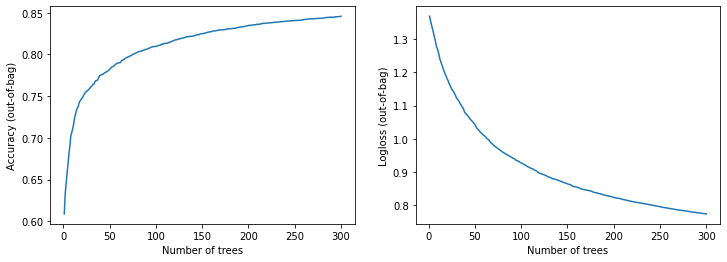

In [23]:
plot_tfdf_model_training_curves(model)

In [24]:
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=None, accuracy=0.84571772813797, loss=0.774069607257843, rmse=None, ndcg=None, aucs=None)

In [25]:
print("Model type:", inspector.model_type())
print("Objective:", inspector.objective())
print("Evaluation:", inspector.evaluation())

Model type: GRADIENT_BOOSTED_TREES
Objective: Classification(label=__LABEL, class=None, num_classes=2)
Evaluation: Evaluation(num_examples=None, accuracy=0.84571772813797, loss=0.774069607257843, rmse=None, ndcg=None, aucs=None)


85% accuracy is not a bad baseline result given how quickly we put this together (and with so few lines of code).

Step 10: Investigate variable importances for the GradientBoostedTrees model

In [26]:
# Adapted from https://www.tensorflow.org/decision_forests/tutorials/advanced_colab
# See list of inspector methods from:
# [field for field in dir(inspector) if not field.startswith("_")]
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_NODES
	 SUM_SCORE
	 NUM_AS_ROOT
	 MEAN_MIN_DEPTH


In [28]:
inspector.variable_importances()["SUM_SCORE"]

[("f_26" (1; #26), 47346.646272782906),
 ("f_21" (1; #21), 46097.90756201648),
 ("f_19" (1; #19), 41042.82378636288),
 ("f_02" (1; #2), 31648.68770296736),
 ("f_00" (1; #0), 29478.95971369493),
 ("f_22" (1; #22), 28401.608441347606),
 ("f_01" (1; #1), 27192.562074673067),
 ("f_07" (1; #7), 27013.23531805449),
 ("f_25" (1; #25), 24100.03852085743),
 ("f_24" (1; #24), 23431.21924064598),
 ("f_05" (1; #5), 23307.482854834987),
 ("f_20" (1; #20), 20940.4661791049),
 ("f_11" (1; #11), 16963.463785735767),
 ("f_23" (1; #23), 16958.70568033874),
 ("f_30" (1; #30), 15072.087354081792),
 ("f_09" (1; #9), 14676.54122321315),
 ("f_03" (1; #3), 14472.409655285062),
 ("f_10" (1; #10), 13895.357160501579),
 ("f_08" (1; #8), 13326.039748164356),
 ("f_15" (1; #15), 12937.791575308456),
 ("f_17" (1; #17), 10792.856100178196),
 ("f_12" (1; #12), 10756.249553777252),
 ("f_28" (1; #28), 10517.397045019487),
 ("f_14" (1; #14), 10322.23465477103),
 ("f_04" (1; #4), 10319.475957605227),
 ("f_06" (1; #6), 807

In [29]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

Step 11: Submit your results

In [30]:
sample_submission_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv')
sample_submission_df.head(5)

,id,target
0,900000,0.5
1,900001,0.5
2,900002,0.5
3,900003,0.5
4,900004,0.5


In [31]:
# Adapted from https://www.kaggle.com/code/rhythmcam/tps-may-20-xgboost-baseline
sample_submission_df['target'] = np.round(model.predict(test_tfds),2)
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

,id,target
0,900000,0.87
1,900001,0.84
2,900002,0.05
3,900003,0.17
4,900004,0.60


TF-DF makes it very easy to find lots of useful information about your model.  For example, the following code cell provides a tremendous amount of information with just a single line of code.  You can preview the output of this code cell by clicking on the "show output" button below.

In [32]:
model.summary()

Model: "gradient_boosted_trees_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (32):
	f_00
	f_01
	f_02
	f_03
	f_04
	f_05
	f_06
	f_07
	f_08
	f_09
	f_10
	f_11
	f_12
	f_13
	f_14
	f_15
	f_16
	f_17
	f_18
	f_19
	f_20
	f_21
	f_22
	f_23
	f_24
	f_25
	f_26
	f_27
	f_28
	f_29
	f_30
	id

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1. "__LABEL"  5.367742 ################
    2.      "id"  5.367312 ###############
    3.    "f_29"  5.357312 ###############
    4.    "f_18"  5.282473 ##############
    5.    "f_16"  5.242366 ##############
    6.    "f_30"  5.223763 ##############
    7.    "f_13"  5.216667 ##############
    8.    "f_28"  5.174194 #############
    9.    "f_27"  5.165161 #######

# Conclusion

[TensorFlow Decision Forests](https://www.tensorflow.org/decision_forests) (TF-DF) made it  quick and easy to train our RandomForest and GradientBoostedTrees models.  These types of decision forest models require minimal pre-processing of the data and are great when working with tabular datasets and/or small datasets (especially if you just want a quick baseline result to compare against).  Some of my favorite parts about  working with TF-DF were: (1) I was able to train a GradientBoostedTrees model with only a few lines of code; (2) there were lots of different default hyper-parameter options that I could choose from; (3) it was easy to visualize the structure/architecture of my models; and (4) it was easy to explore what features were most important to my model (to interpret and explain its decisions).


We worked with the [Tabular Playground Series May 2022](https://www.kaggle.com/competitions/tabular-playground-series-may-2022/data) Kaggle Dataset.  It was a tabular dataset with 900,000 rows and 33 columns that contained data from industrial sensors, designed t be used to determine whether that piece of industrial equipment was in a state of  "0" or "1".

We were able to solve this task with an accuracy of ~85% which is not a bad baseline result given how quickly we were able to put this together (and with so few lines of code).

To learn more about TF-DF visit https://www.tensorflow.org/decision_forests.

Next steps?
 - Click on the "copy & edit" button in the top right corner of this notebook
 - Experiment and try to increase the score.  My recommendation would be to focus on the [feature engineering and feature selection](https://www.kaggle.com/learn/feature-engineering) steps, as these steps were omitted from this tutorial (for the sake of brevity)
 - Make a submission to https://www.kaggle.com/competitions/tabular-playground-series-may-2022

References:
 - https://www.tensorflow.org/decision_forests/tutorials/beginner_colab
 - https://www.tensorflow.org/decision_forests/tutorials/intermediate_colab
 - https://www.tensorflow.org/decision_forests/tutorials/advanced_colab